In [3]:
import pandas as pd
df = pd.read_csv("TrazasHP_Eventos_Febrero.csv", delimiter=';')

In [4]:
level_filtered = df[df['Value.EventType'].str.contains('InicioNivelEvent') | df['Value.EventType'].str.contains('MuerteJugadorEvent') | df['Value.EventType'].str.contains('DisparoEvent')]

from collections import defaultdict
# Guarda los disparoevent por persona
accuracysSid = defaultdict(list)
# Guarda los niveles que ha empezado por run y por persona
delimiters = defaultdict(list)
# Al final se dividiran para extraer la vida perdida por nivel por run

weaponsIDs = defaultdict(list)

run = 0
current_sid = ''
for ind in level_filtered.index:
    a = str(level_filtered['Name'][ind])
    if a not in current_sid:
        run = 0
        current_sid = a
        
    if 'DisparoEvent' in level_filtered['Value.EventType'][ind]:
        weaponsIDs[current_sid].append(level_filtered['Value.Weapon'][ind])
        if level_filtered['Value.ShotCount'][ind] == 0:
            accuracysSid[current_sid].append(-1)
        elif "Shotgun" in level_filtered['Value.Weapon'][ind]:
            accuracysSid[current_sid].append(level_filtered['Value.Hits'][ind] / level_filtered['Value.ShotCount'][ind] / 4)
        elif "Rafagas" in level_filtered['Value.Weapon'][ind]:
            accuracysSid[current_sid].append(level_filtered['Value.Hits'][ind] / level_filtered['Value.ShotCount'][ind] / 3)
        else:
            accuracysSid[current_sid].append(level_filtered['Value.Hits'][ind] / level_filtered['Value.ShotCount'][ind])
    # La unica manera de acabar la run es muriendo, asi se pasa a la siguiente
    elif 'InicioNivel' in level_filtered['Value.EventType'][ind]:
        if 1 == level_filtered['Value.LevelID'][ind]:
            delimiters[current_sid].append(len(accuracysSid[current_sid]))

In [5]:
df_forms = pd.read_csv("TrazasHP_Forms_Febrero.csv", delimiter=';')
skills = df_forms[['Name','Value.Skill']].dropna()

skillsIDs = defaultdict(list)
for ind in skills.index:
    skillsIDs[skills['Name'][ind]].append(skills['Value.Skill'][ind])

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = []
y = []

In [38]:
for ind in skillsIDs:
    formsindex = -1
    for i in range(0,len(accuracysSid[str(ind)])):
        if i == delimiters[str(ind)][formsindex]:
            formsindex += 1
        if accuracysSid[str(ind)][i] != -1:
            y.append(accuracysSid[str(ind)][i])
            x.append(skillsIDs[ind][formsindex])

#plt.scatter(x,y)
#plt.show()

In [39]:
x_infinite = []
y_infinite = []

x_pistol = []
y_pistol = []

x_shotgun = []
y_shotgun = []

x_lanzallamas = []
y_lanzallamas = []

x_sniper = []
y_sniper = []

x_rafagas = []
y_rafagas = []

x_metralleta = []
y_metralleta = []

x_bazooka = []
y_bazooka = []

x_grenadelauncher = []
y_grenadelauncher = []

x_minigun = []
y_minigun = []

for ind in skillsIDs:
    formsindex = -1
    for i in range(0,len(accuracysSid[str(ind)])):
        if i == delimiters[str(ind)][formsindex]:
                formsindex += 1
        if "Infite" in weaponsIDs[str(ind)][i]:
            if accuracysSid[str(ind)][i] != -1:
                y_infinite.append(accuracysSid[str(ind)][i])
                x_infinite.append(skillsIDs[ind][formsindex])
        if "Pistol" in weaponsIDs[str(ind)][i]:
            if accuracysSid[str(ind)][i] != -1:
                y_pistol.append(accuracysSid[str(ind)][i])
                x_pistol.append(skillsIDs[ind][formsindex])
        if "Shotgun" in weaponsIDs[str(ind)][i]:
            if accuracysSid[str(ind)][i] != -1:
                y_shotgun.append(accuracysSid[str(ind)][i])
                x_shotgun.append(skillsIDs[ind][formsindex])
        if "Lanzallamas" in weaponsIDs[str(ind)][i]:
            if accuracysSid[str(ind)][i] != -1:
                y_lanzallamas.append(accuracysSid[str(ind)][i])
                x_lanzallamas.append(skillsIDs[ind][formsindex])
        if "Sniper" in weaponsIDs[str(ind)][i]:
            if accuracysSid[str(ind)][i] != -1:
                y_sniper.append(accuracysSid[str(ind)][i])
                x_sniper.append(skillsIDs[ind][formsindex])
        if "Rafagas" in weaponsIDs[str(ind)][i]:
            if accuracysSid[str(ind)][i] != -1:
                y_rafagas.append(accuracysSid[str(ind)][i])
                x_rafagas.append(skillsIDs[ind][formsindex])
        if "Metralleta" in weaponsIDs[str(ind)][i]:
            if accuracysSid[str(ind)][i] != -1:
                y_metralleta.append(accuracysSid[str(ind)][i])
                x_metralleta.append(skillsIDs[ind][formsindex])
        if "Bazooka" in weaponsIDs[str(ind)][i]:
            if accuracysSid[str(ind)][i] != -1:
                y_bazooka.append(accuracysSid[str(ind)][i])
                x_bazooka.append(skillsIDs[ind][formsindex])
        if "GrenadeLauncher" in weaponsIDs[str(ind)][i]:
            if accuracysSid[str(ind)][i] != -1:
                y_grenadelauncher.append(accuracysSid[str(ind)][i])
                x_grenadelauncher.append(skillsIDs[ind][formsindex])
        if "Minigun" in weaponsIDs[str(ind)][i]:
            if accuracysSid[str(ind)][i] != -1:
                y_minigun.append(accuracysSid[str(ind)][i])
                x_minigun.append(skillsIDs[ind][formsindex])

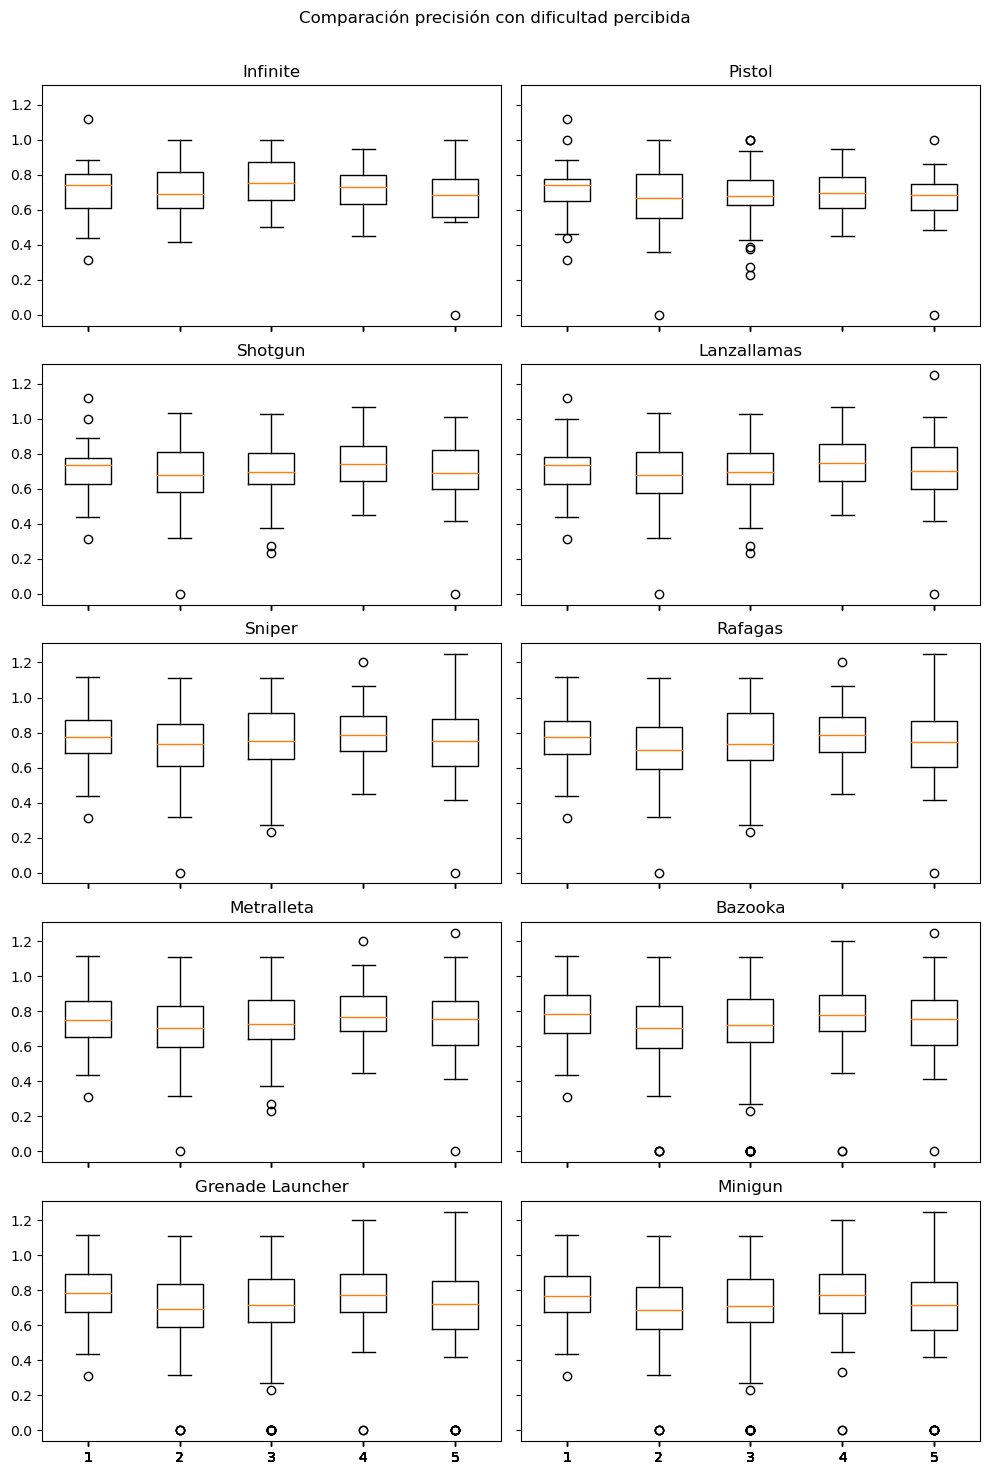

In [49]:
import math
f, axs = plt.subplots(5, 2, sharey=True, sharex=True)
f.set_size_inches(10,15)

data = [[],[],[],[],[]]

for i in range(0,len(x_infinite)):
    if not math.isnan(y_infinite[i]):
        data[int(x_infinite[i]) - 1].append(y_infinite[i])
axs[0,0].boxplot(data)
axs[0,0].set_title("Infinite")

for i in range(0,len(x_pistol)):
    if not math.isnan(y_pistol[i]):
        data[int(x_pistol[i]) - 1].append(y_pistol[i])
axs[0,1].boxplot(data)
axs[0,1].set_title("Pistol")

for i in range(0,len(x_shotgun)):
    if not math.isnan(y_shotgun[i]):
        data[int(x_shotgun[i]) - 1].append(y_shotgun[i])
axs[1,0].boxplot(data)
axs[1,0].set_title("Shotgun")

for i in range(0,len(x_lanzallamas)):
    if not math.isnan(y_lanzallamas[i]):
        data[int(x_lanzallamas[i]) - 1].append(y_lanzallamas[i])
axs[1,1].boxplot(data)
axs[1,1].set_title("Lanzallamas")

for i in range(0,len(x_sniper)):
    if not math.isnan(y_sniper[i]):
        data[int(x_sniper[i]) - 1].append(y_sniper[i])
axs[2,0].boxplot(data)
axs[2,0].set_title("Sniper")

for i in range(0,len(x_rafagas)):
    if not math.isnan(y_rafagas[i]):
        data[int(x_rafagas[i]) - 1].append(y_rafagas[i])
axs[2,1].boxplot(data)
axs[2,1].set_title("Rafagas")

for i in range(0,len(x_metralleta)):
    if not math.isnan(y_metralleta[i]):
        data[int(x_metralleta[i]) - 1].append(y_metralleta[i])
axs[3,0].boxplot(data)
axs[3,0].set_title("Metralleta")

for i in range(0,len(x_bazooka)):
    if not math.isnan(y_bazooka[i]):
        data[int(x_bazooka[i]) - 1].append(y_bazooka[i])
axs[3,1].boxplot(data)
axs[3,1].set_title("Bazooka")

for i in range(0,len(x_grenadelauncher)):
    if not math.isnan(y_grenadelauncher[i]):
        data[int(x_grenadelauncher[i]) - 1].append(y_grenadelauncher[i])
axs[4,0].boxplot(data)
axs[4,0].set_title("Grenade Launcher")

for i in range(0,len(x_minigun)):
    if not math.isnan(y_minigun[i]):
        data[int(x_minigun[i]) - 1].append(y_minigun[i])
axs[4,1].boxplot(data)
axs[4,1].set_title("Minigun")

plt.tight_layout()

f.suptitle("Comparación precisión con dificultad percibida")
f.subplots_adjust(top=0.93)

plt.savefig("Resultados/Precision-Forms.pdf", format="pdf", bbox_inches="tight")

plt.show()